/tmp/ipykernel_1697/214011351.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = data.groupby(['Variable', 'Warengruppe']).apply(calculate_confidence_interval).reset_index()


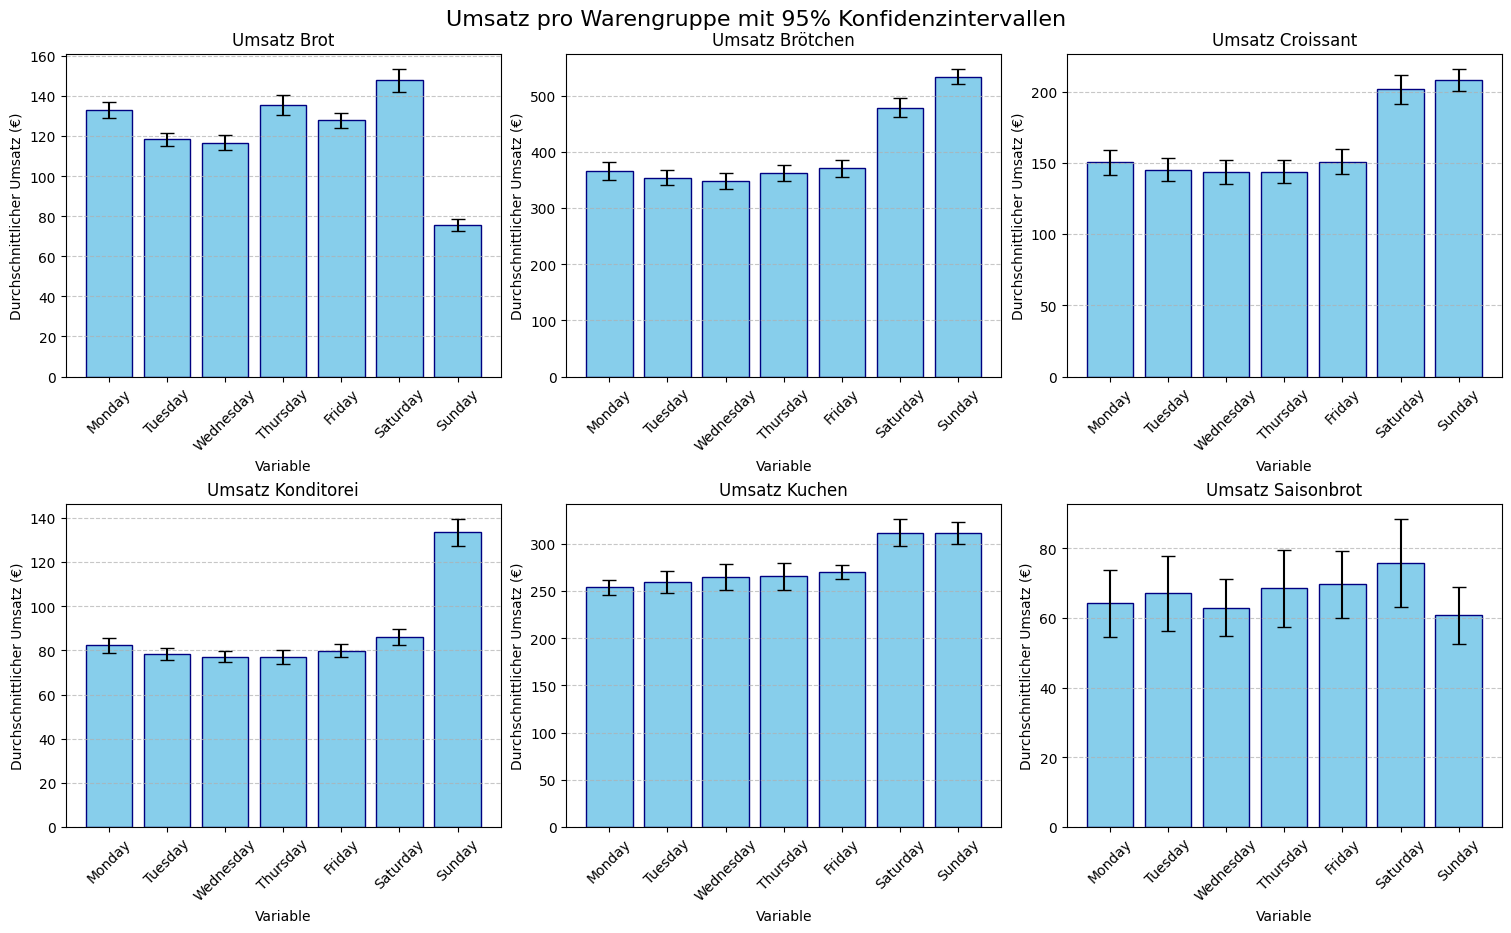

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t

data= pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/umsatzdaten_codiert.csv")

# Definiere ariable, hier Wochentag
data['Variable']=data['Wochentag'] 

# Definieren der Warengruppen-Beschriftungen
Warengruppe = [1, 2, 3, 4, 5, 6]
Backwaren = ["Brot", "Brötchen", "Croissant", "Konditorei", "Kuchen", "Saisonbrot"]

# Konfidenzintervall-Berechnung für jede Warengruppe
confidence = 0.95  # 95% Konfidenzintervall

# Detaillierte Konfidenzintervall-Berechnung
def calculate_confidence_interval(group):
    mean = group['Umsatz'].mean()
    count = len(group)
    std = group['Umsatz'].std()
    standard_error = std / np.sqrt(count)
    t_value = t.ppf((1 + confidence) / 2, count - 1)
    ci_width = t_value * standard_error
    return pd.Series({
        'mean': mean,
        'ci_lower': mean - ci_width,
        'ci_upper': mean + ci_width
    })

# Gruppierung nach Wochentag und Warengruppe mit Konfidenzintervallen
summary = data.groupby(['Variable', 'Warengruppe']).apply(calculate_confidence_interval).reset_index()

# Ersetzen der Warengruppen-Nummern durch Backwaren-Namen
summary['Warengruppe'] = summary['Warengruppe'].map(dict(zip(Warengruppe, Backwaren)))

# Sortierung der Wochentage
wochentage_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Visualisierung mit Konfidenzintervallen für jede Warengruppe
# Erhöhter vertikaler Platz für den Titel
plt.figure(figsize=(15, 9), constrained_layout=True)

# Liste der Warengruppen
warengruppen = summary['Warengruppe'].unique()

# Subplots für jede Warengruppe
for i, gruppe in enumerate(warengruppen, 1):
    plt.subplot(2, 3, i)
    gruppe_data = summary[summary['Warengruppe'] == gruppe]
   
    # Sortieren nach Wochentagsreihenfolge
    gruppe_data = gruppe_data.set_index('Variable').loc[wochentage_order].reset_index()
   
    plt.bar(gruppe_data['Variable'], gruppe_data['mean'], yerr=(gruppe_data['mean'] - gruppe_data['ci_lower'], gruppe_data['ci_upper'] - gruppe_data['mean']),
            capsize=5, color='skyblue', edgecolor='navy')
   
    plt.title(f'Umsatz {gruppe}')
    plt.xlabel('Variable')
    plt.ylabel('Durchschnittlicher Umsatz (€)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Titel mit mehr Abstand
plt.suptitle('Umsatz pro Warengruppe mit 95% Konfidenzintervallen', fontsize=16, y=1.02)
plt.show()

0.261904762 0.0 0.972938144


/tmp/ipykernel_1697/3639822028.py:46: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = data.groupby(['variable_bin', 'Warengruppe']).apply(calculate_confidence_interval).reset_index()
/tmp/ipykernel_1697/3639822028.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = data.groupby(['variable_bin', 'Warengruppe']).apply(calculate_confidence_interval).reset_index()


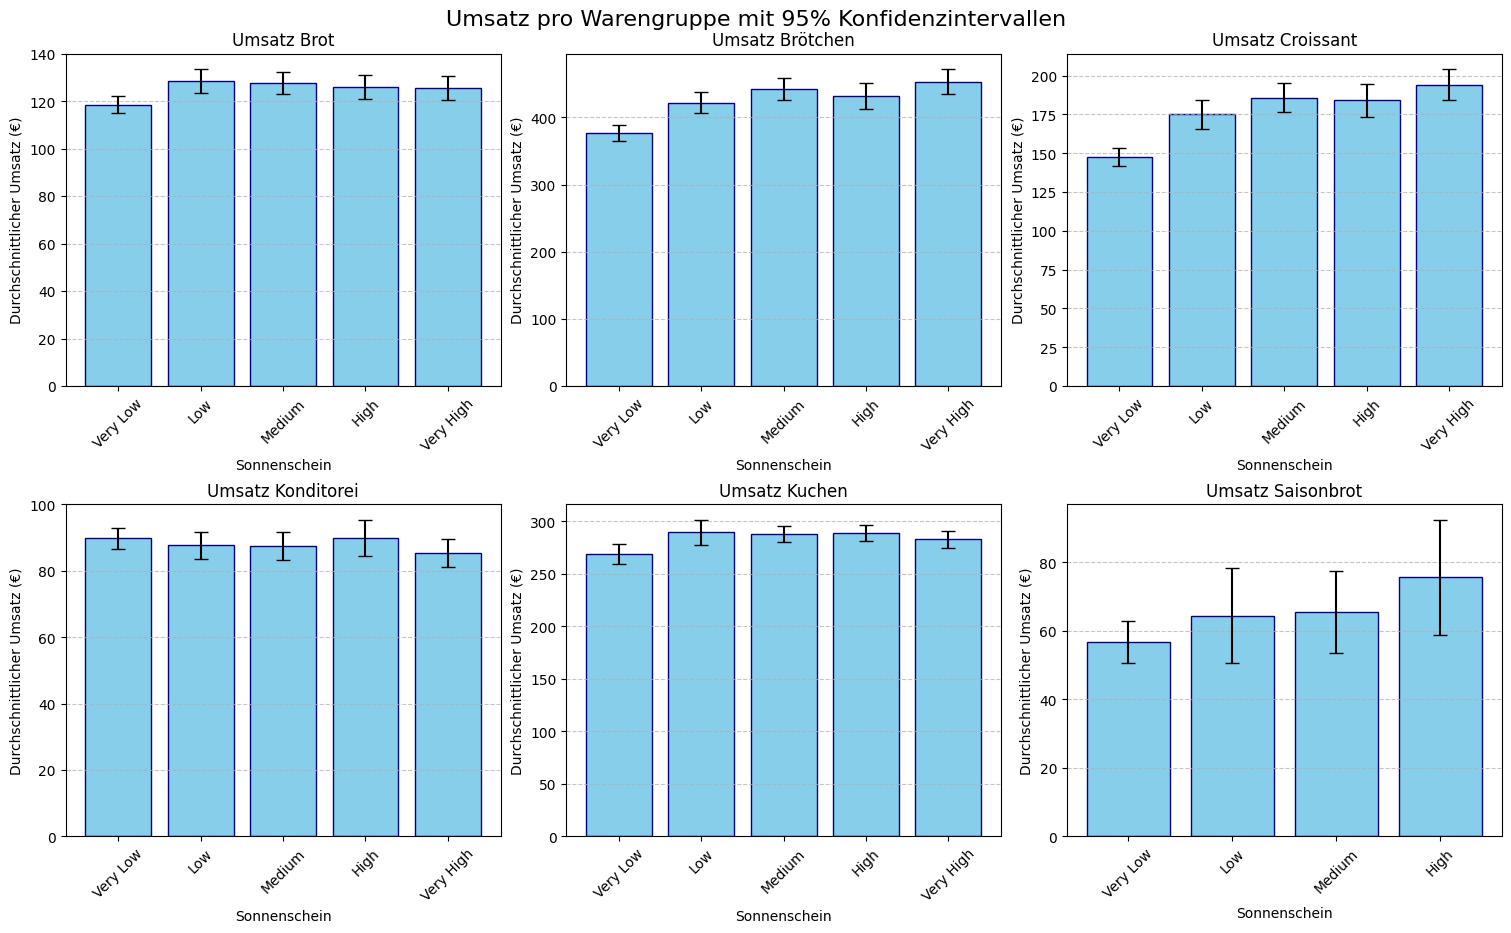

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# Read data
data = pd.read_csv("/workspaces/DS_ML_Gr_1.5/2_BaselineModel/merged_data_new.csv")

# Definiere die kontinuierliche Variable
data['variable'] = data['Sonnenschein']  
Variable='Sonnenschein' #für Titel in der Grafik

# Binning der Temperatur 
#zum berechnen der bins
median=np.median(data['variable'])
min=np.min(data['variable'])
max=np.max(data['variable'])
print(median, min, max)
#
bins = [0.0,0.20, 0.40,0.60,0.80,1.00]  # müssen manuell angepasst werden
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']  # Labels for each bin
data['variable_bin'] = pd.cut(data['variable'], bins=bins, labels=labels)

# Definieren der Warengruppen-Beschriftungen
Warengruppe = [1, 2, 3, 4, 5, 6]
Backwaren = ["Brot", "Brötchen", "Croissant", "Konditorei", "Kuchen", "Saisonbrot"]

# Konfidenzintervall-Berechnung für jede Warengruppe
confidence = 0.95  # 95% Konfidenzintervall

# Detaillierte Konfidenzintervall-Berechnung
def calculate_confidence_interval(group):
    mean = group['Umsatz'].mean()
    count = len(group)
    std = group['Umsatz'].std()
    standard_error = std / np.sqrt(count)
    t_value = t.ppf((1 + confidence) / 2, count - 1)
    ci_width = t_value * standard_error
    return pd.Series({
        'mean': mean,
        'ci_lower': mean - ci_width,
        'ci_upper': mean + ci_width
    })

# Gruppierung nach Temperatur-Bin und Warengruppe mit Konfidenzintervallen
summary = data.groupby(['variable_bin', 'Warengruppe']).apply(calculate_confidence_interval).reset_index()

# Ersetzen der Warengruppen-Nummern durch Backwaren-Namen
summary['Warengruppe'] = summary['Warengruppe'].map(dict(zip(Warengruppe, Backwaren)))

# Visualisierung mit Konfidenzintervallen für jede Warengruppe
plt.figure(figsize=(15, 9), constrained_layout=True)

# Liste der Warengruppen
warengruppen = summary['Warengruppe'].unique()

# Subplots für jede Warengruppe
for i, gruppe in enumerate(warengruppen, 1):
    plt.subplot(2, 3, i)
    gruppe_data = summary[summary['Warengruppe'] == gruppe]

    # Sortieren nach Temperatur-Bin
    gruppe_data = gruppe_data.sort_values('variable_bin')

    plt.bar(gruppe_data['variable_bin'], gruppe_data['mean'], yerr=(gruppe_data['mean'] - gruppe_data['ci_lower'], gruppe_data['ci_upper'] - gruppe_data['mean']),
            capsize=5, color='skyblue', edgecolor='navy')

    plt.title(f'Umsatz {gruppe}')
    plt.xlabel(Variable) 
    plt.ylabel('Durchschnittlicher Umsatz (€)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Titel mit mehr Abstand
plt.suptitle('Umsatz pro Warengruppe mit 95% Konfidenzintervallen', fontsize=16, y=1.02)
plt.show()


/tmp/ipykernel_1697/3428026357.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = data.groupby(['variable', 'Warengruppe']).apply(calculate_confidence_interval).reset_index()
/tmp/ipykernel_1697/3428026357.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = data.groupby(['variable', 'Warengruppe']).apply(calculate_confidence_interval).reset_index()


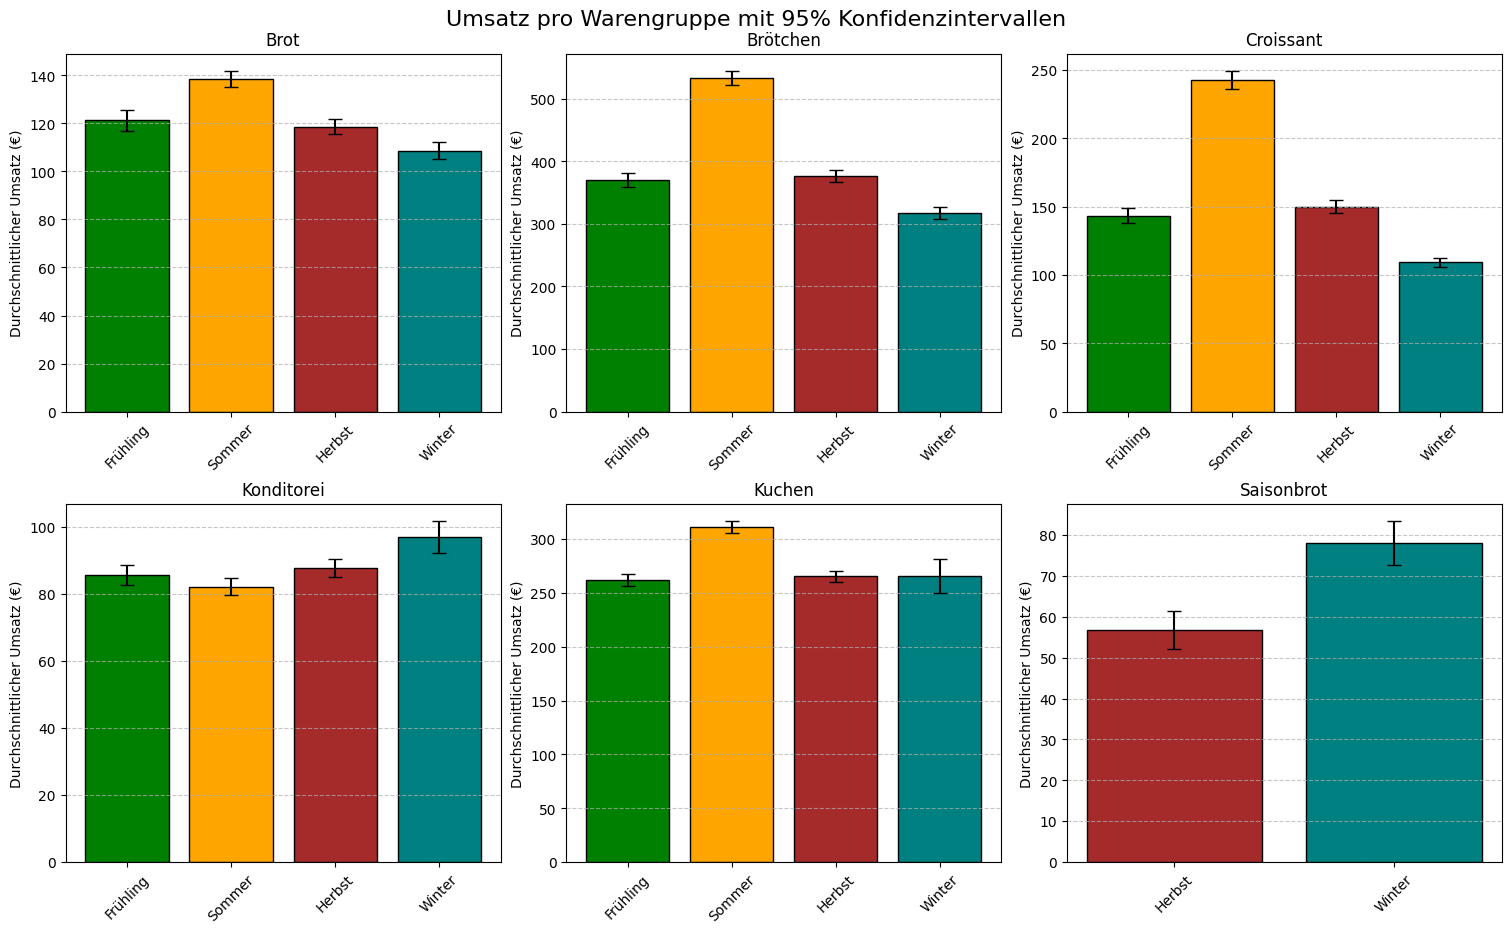

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# Read data
data = pd.read_csv("/workspaces/DS_ML_Gr_1.5/2_BaselineModel/merged_data_new.csv")

 
# Die Jahreszeit ist kategorisch
data['variable'] = data['Jahreszeit'] 

# Falls nötig, sicherstellen, dass 'variable' eine kategoriale Spalte ist
data['variable'] = pd.Categorical(data['variable'], categories=['Frühling', 'Sommer', 'Herbst', 'Winter'], ordered=True)

# Definieren der Warengruppen-Beschriftungen
Warengruppe = [1, 2, 3, 4, 5, 6]
Backwaren = ["Brot", "Brötchen", "Croissant", "Konditorei", "Kuchen", "Saisonbrot"]

# Konfidenzintervall-Berechnung für jede Warengruppe
confidence = 0.95  # 95% Konfidenzintervall

# Detaillierte Konfidenzintervall-Berechnung
def calculate_confidence_interval(group):
    mean = group['Umsatz'].mean()
    count = len(group)
    std = group['Umsatz'].std()
    standard_error = std / np.sqrt(count) if count > 1 else 0  # Vermeidung von Division durch 0
    t_value = t.ppf((1 + confidence) / 2, count - 1) if count > 1 else 0
    ci_width = t_value * standard_error
    return pd.Series({
        'mean': mean,
        'ci_lower': mean - ci_width,
        'ci_upper': mean + ci_width
    })

# Gruppierung nach Temperatur-Bin und Warengruppe mit Konfidenzintervallen
summary = data.groupby(['variable', 'Warengruppe']).apply(calculate_confidence_interval).reset_index()

# Ersetzen der Warengruppen-Nummern durch Backwaren-Namen
summary['Warengruppe'] = summary['Warengruppe'].map(dict(zip(Warengruppe, Backwaren)))

# Farben für die Jahreszeiten
farben = {
    'Frühling': 'green',
    'Sommer': 'orange',
    'Herbst': 'brown',
    'Winter': 'teal'
}
# Visualisierung mit Konfidenzintervallen für jede Warengruppe
plt.figure(figsize=(15, 9), constrained_layout=True)

# Liste der Warengruppen
warengruppen = summary['Warengruppe'].unique()

# Subplots für jede Warengruppe
for i, gruppe in enumerate(warengruppen, 1):
    plt.subplot(2, 3, i)
    gruppe_data = summary[summary['Warengruppe'] == gruppe]

    # Sortieren nach Temperatur-Bin
    gruppe_data = gruppe_data.sort_values('variable')
    # Farben für Balken
    bar_colors = [farben[season] for season in gruppe_data['variable']]
    plt.bar(gruppe_data['variable'], gruppe_data['mean'], 
        yerr=(gruppe_data['mean'] - gruppe_data['ci_lower'], gruppe_data['ci_upper'] - gruppe_data['mean']),
        capsize=5, color=bar_colors, edgecolor='black')

    plt.title(f'{gruppe}')
    plt.ylabel('Durchschnittlicher Umsatz (€)')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Titel mit mehr Abstand
plt.suptitle('Umsatz pro Warengruppe mit 95% Konfidenzintervallen', fontsize=16, y=1.02)
plt.show()
